# Evaluation of KLF6 targets 

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
import celloracle as co
co.__version__

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


'0.10.14'

In [4]:
from gprofiler import GProfiler

In [5]:
gp = GProfiler(return_dataframe=True)

## Trevino et al 2021

In [6]:
links = co.load_hdf5(file_path="/home/jovyan/jm_jlab/data_indNeuro/1.GRN/milestones_pcw16_baggindridge.celloracle.links")

In [7]:
sc.set_figure_params(figsize=(8,4))

links.plot_score_per_cluster(goi="KLF6")

KLF6


In [8]:
klf6_vRG = links.filtered_links['vRG'][links.filtered_links['vRG']['source'] == 'KLF6']['target']
klf6_oRG = links.filtered_links['oRG'][links.filtered_links['oRG']['source'] == 'KLF6']['target']

In [9]:
klf6_oRG.isin(klf6_vRG).sum()/len(klf6_oRG)

0.22404371584699453

In [10]:
enrich_oRG = gp.profile(organism='hsapiens',
            query=klf6_oRG.tolist(), no_evidences=False)

In [11]:
enrich_vRG = gp.profile(organism='hsapiens',
            query=klf6_vRG.tolist(), no_evidences=False)

## Polioudakis et al 2019

In [12]:
# You can load files with the following command.
links_pol = co.load_hdf5(file_path="/home/jovyan/jm_jlab/data_indNeuro/1.GRN/pol19_baggingridge.links.celloracle.links")

In [13]:
sc.set_figure_params(figsize=(8,4))

links_pol.plot_score_per_cluster(goi="KLF6")

KLF6


In [14]:
klf6_vRG_pol = links_pol.filtered_links['vRG'][links_pol.filtered_links['vRG']['source'] == 'KLF6']['target']
klf6_oRG_pol = links_pol.filtered_links['oRG'][links_pol.filtered_links['oRG']['source'] == 'KLF6']['target']

In [15]:
klf6_oRG_pol.isin(klf6_vRG_pol).sum()/len(klf6_oRG_pol)

0.25

In [16]:
enrich_oRG_KLF6_pol19 = gp.profile(organism='hsapiens',
            query=klf6_oRG_pol.tolist(), 
               no_evidences=False)

In [17]:
enrich_vRG_KLF6_pol19 = gp.profile(organism='hsapiens',
            query=klf6_vRG_pol.tolist(), 
               no_evidences=False)

### Shared targets between datasets

In [18]:
d = {'Trevino21': [klf6_oRG.isin(klf6_oRG).sum()/len(klf6_oRG)*100, 
               klf6_oRG.isin(klf6_oRG_pol).sum()/len(klf6_oRG)*100,
 klf6_vRG.isin(klf6_vRG).sum()/len(klf6_vRG)*100, 
 klf6_vRG.isin(klf6_vRG_pol).sum()/len(klf6_vRG)*100],
     
 
 
 'Polioudakis19': [klf6_oRG_pol.isin(klf6_oRG).sum()/len(klf6_oRG_pol)*100, 
                 klf6_oRG_pol.isin(klf6_oRG_pol).sum()/len(klf6_oRG_pol)*100,
                 klf6_vRG_pol.isin(klf6_vRG).sum()/len(klf6_vRG_pol)*100, 
                 klf6_vRG_pol.isin(klf6_vRG_pol).sum()/len(klf6_vRG_pol)*100]}

In [19]:
overlap = pd.DataFrame(d, index=['Trevino21_oRG', 'Polioudakis19_oRG', 'Trevino21_vRG', 'Polioudakis19_vRG'])

### **Polioudakis 2019 KLF6 regulon**

In [22]:
!wget https://www.cell.com/cms/10.1016/j.neuron.2019.06.011/attachment/d6337751-fed2-4e9c-ac8d-1a0d3ad24373/mmc8.xlsx -O mmc8.xlsx

--2023-03-22 21:41:54--  https://www.cell.com/cms/10.1016/j.neuron.2019.06.011/attachment/d6337751-fed2-4e9c-ac8d-1a0d3ad24373/mmc8.xlsx
Resolving www.cell.com (www.cell.com)... 104.18.123.114, 104.18.124.114
Connecting to www.cell.com (www.cell.com)|104.18.123.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 739018 (722K) [application/octet-stream]
Saving to: ‘mmc8.xlsx’

mmc8.xlsx           100%[===================>] 721.70K  1.87MB/s    in 0.4s    

2023-03-22 21:41:55 (1.87 MB/s) - ‘mmc8.xlsx’ saved [739018/739018]



In [23]:
regulons = pd.read_excel("mmc8.xlsx", sheet_name="TF gene modules")

In [24]:
klf6_regulon = regulons[['KLF6']].dropna()

In [25]:
klf6_regulon_list = klf6_regulon.KLF6.values.tolist()

In [26]:
klf6_regulon_list.append("KLF6")

In [27]:
enrich_regulon_pol19 = gp.profile(organism='hsapiens',
            query=klf6_regulon_list, 
               no_evidences=False)

In [28]:
!rm mmc8.xlsx

### Saving results to xlsx file

In [29]:
sheet_names_klf6 = dict({0:"oRG_Trevino21_KLF6",1:"vRG_Trevino21_KLF6",2:"oRG_Polioudakis19_KLF6",3:"vRG_Polioudakis19_KLF6",4:'KLF6targets_overlap',5:'Polioudakis19_KLF6regulon'})

In [30]:
sheet_names_klf6

{0: 'oRG_Trevino21_KLF6',
 1: 'vRG_Trevino21_KLF6',
 2: 'oRG_Polioudakis19_KLF6',
 3: 'vRG_Polioudakis19_KLF6',
 4: 'KLF6targets_overlap',
 5: 'Polioudakis19_KLF6regulon'}

In [31]:
cbl_github = '/home/jovyan/jm_jlab/CBL_data/indirectNeurogenesis/GRN_CellOracle/'

### GO plot

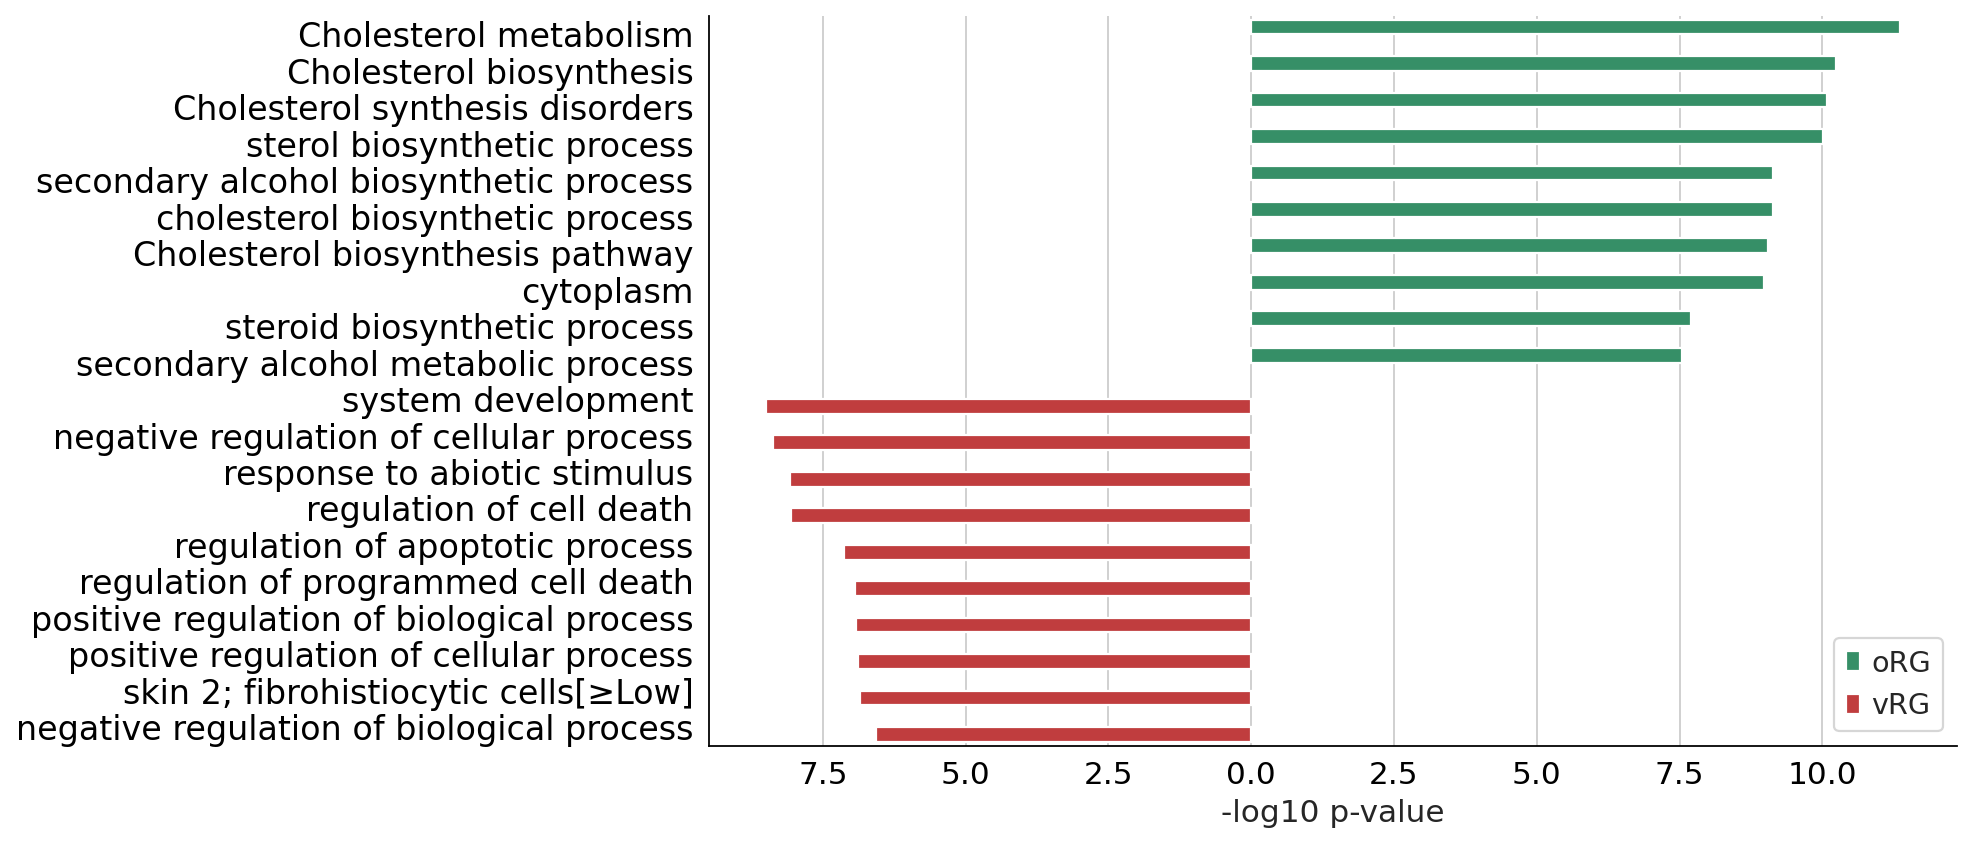

In [43]:
top10_vRG = enrich_vRG[enrich_vRG['source'] != 'TF'].sort_values('p_value').head(10)
top10_oRG = enrich_oRG[enrich_oRG['source'] != 'TF'].sort_values('p_value').head(10)

top10_oRG['p_value'] = -np.log10(top10_oRG['p_value'])

top10_vRG['p_value'] = np.log10(top10_vRG['p_value'])



top10_oRG = top10_oRG[['name', 'p_value']]
top10_oRG['color'] = 'oRG'

top10_vRG = top10_vRG[['name', 'p_value']]
top10_vRG['color'] = 'vRG'

mydf = top10_oRG.append(top10_vRG, ignore_index=True)

mydf['name'][0]

mydf['name'][0] = 'Cholesterol metabolism' #For plotting purposes, instead of Cholesterol metabolism with Bloch and Kandutsc...

plt.rcParams["figure.figsize"] = [10, 6]


g = sns.barplot(data=mydf,
    x='p_value',
    y='name',
    hue='color', palette=dict({"oRG": "#279E68", "vRG": '#D62728'})
)
g.set(xlabel="-log10 p-value") 
g.set(ylabel=None)  # remove the axis label
g.set_xticklabels(np.array([0, 7.5, 5, 2.5, 0, 2.5, 5, 7.5, 10])) #all log10
sns.despine()

plt.legend(title="", loc=4)
plt.yticks(fontsize=15, rotation=0)
plt.show()

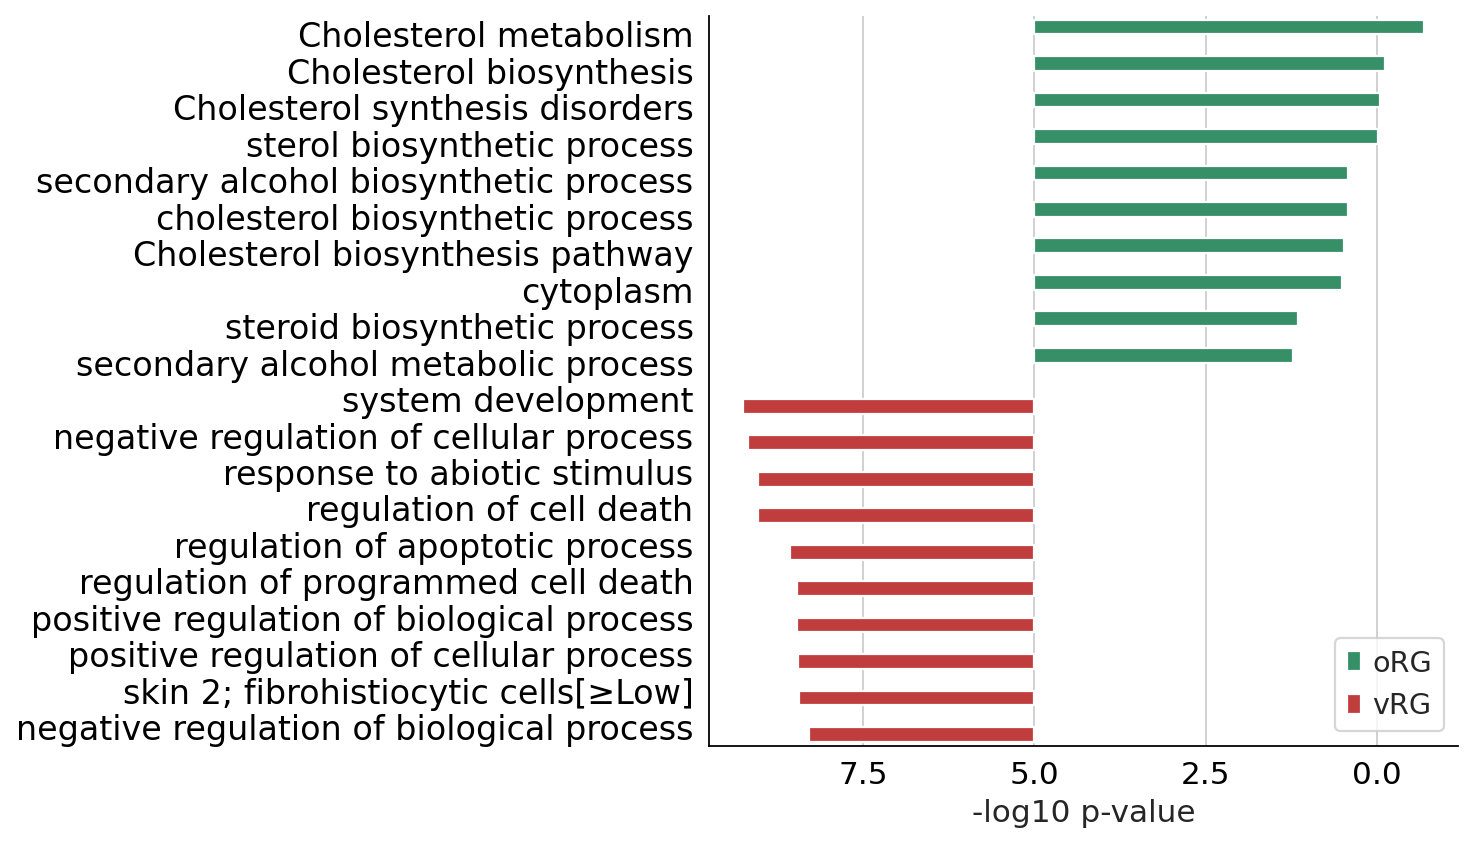

In [44]:
top10_vRG = enrich_vRG[enrich_vRG['source'] != 'TF'].sort_values('p_value').head(10)
top10_oRG = enrich_oRG[enrich_oRG['source'] != 'TF'].sort_values('p_value').head(10)

top10_oRG['p_value'] = -np.log10(top10_oRG['p_value'])

top10_vRG['p_value'] = np.log10(top10_vRG['p_value'])



top10_oRG = top10_oRG[['name', 'p_value']]
top10_oRG['color'] = 'oRG'

top10_vRG = top10_vRG[['name', 'p_value']]
top10_vRG['color'] = 'vRG'

mydf = top10_oRG.append(top10_vRG, ignore_index=True)

mydf['name'][0]

mydf['name'][0] = 'Cholesterol metabolism' #For plotting purposes, instead of Cholesterol metabolism with Bloch and Kandutsc...

plt.rcParams["figure.figsize"] = [6, 6]


g = sns.barplot(data=mydf,
    x='p_value',
    y='name',
    hue='color', palette=dict({"oRG": "#279E68", "vRG": '#D62728'})
)
g.set(xlabel="-log10 p-value") 
g.set(ylabel=None)  # remove the axis label
g.set_xticklabels(np.array([0, 7.5, 5, 2.5, 0, 2.5, 5, 7.5, 10])) #all log10
sns.despine()

plt.legend(title="", loc=4)
plt.yticks(fontsize=15, rotation=0)
plt.show()

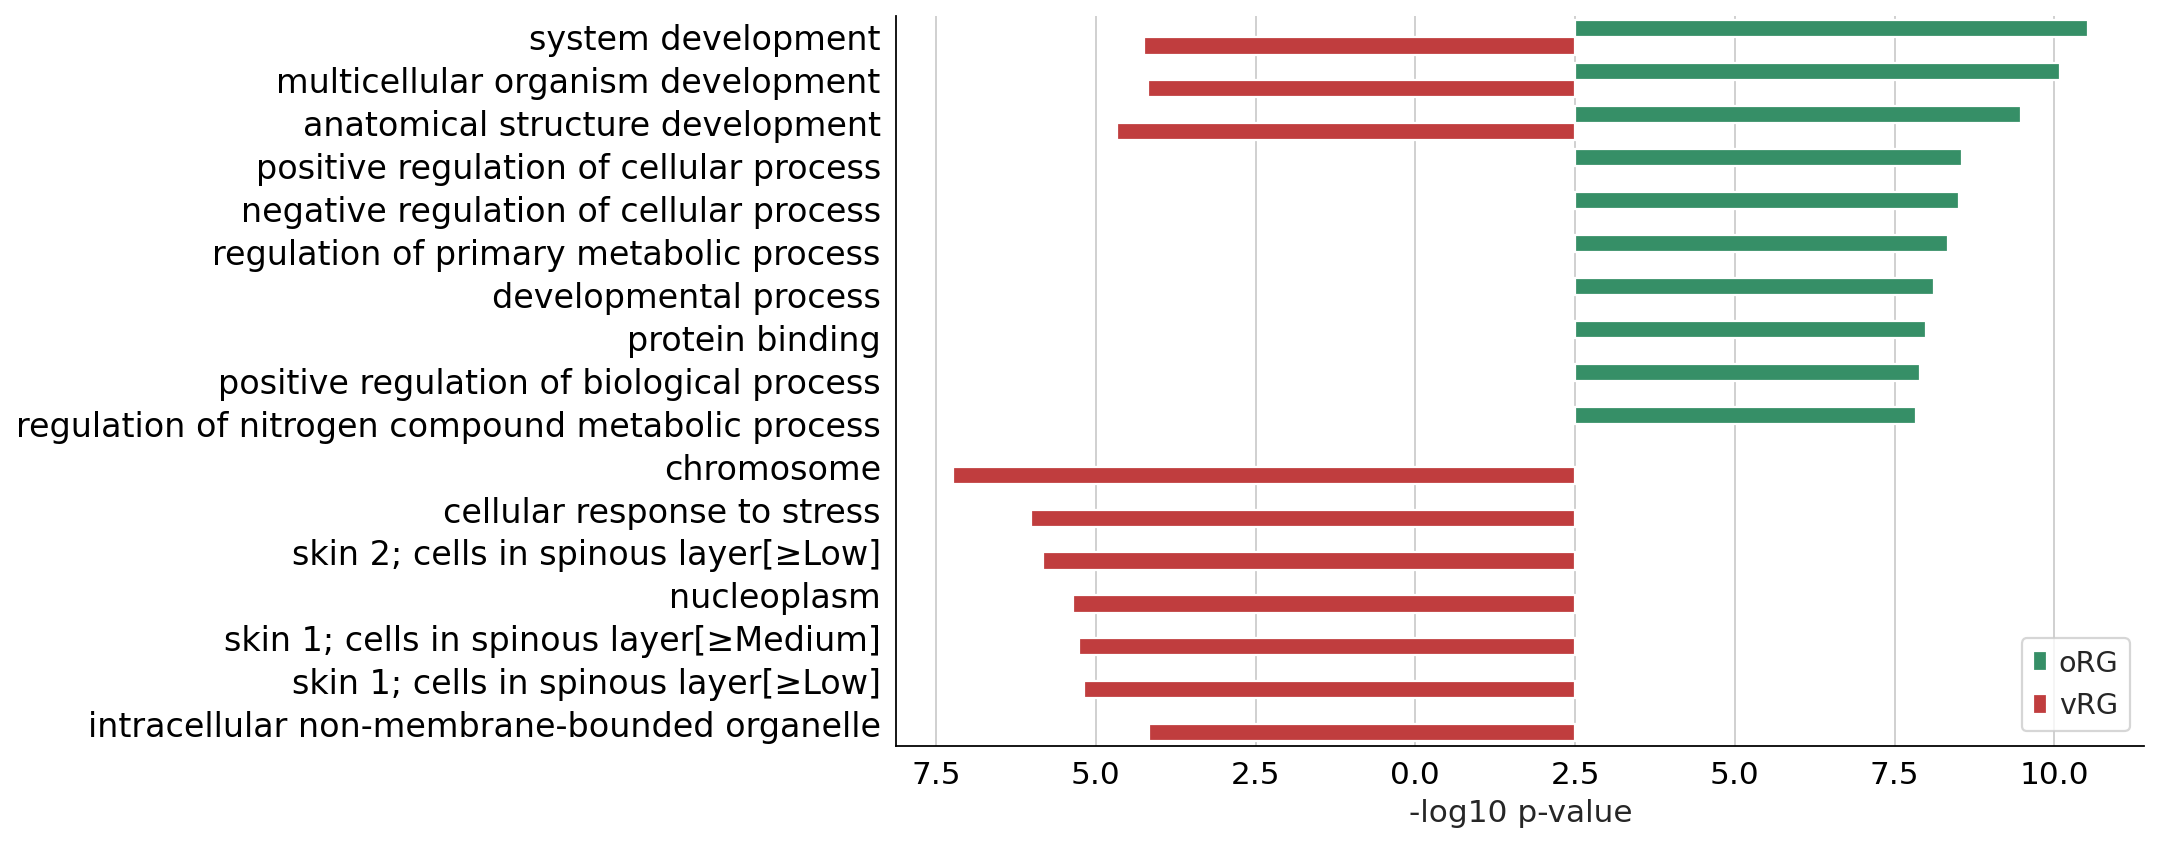

In [45]:
top10_vRG_pol = enrich_vRG_KLF6_pol19[enrich_vRG_KLF6_pol19['source'] != 'TF'].sort_values('p_value').head(10)
top10_oRG_pol = enrich_oRG_KLF6_pol19[enrich_oRG_KLF6_pol19['source'] != 'TF'].sort_values('p_value').head(10)

top10_oRG_pol['p_value'] = -np.log10(top10_oRG_pol['p_value'])

top10_vRG_pol['p_value'] = np.log10(top10_vRG_pol['p_value'])



top10_oRG_pol = top10_oRG_pol[['name', 'p_value']]
top10_oRG_pol['color'] = 'oRG'

top10_vRG_pol = top10_vRG_pol[['name', 'p_value']]
top10_vRG_pol['color'] = 'vRG'

mydf = top10_oRG_pol.append(top10_vRG_pol, ignore_index=True)

plt.rcParams["figure.figsize"] = [10, 6]


g = sns.barplot(data=mydf,
    x='p_value',
    y='name',
    hue='color', palette=dict({"oRG": "#279E68", "vRG": '#D62728'})
)
g.set(xlabel="-log10 p-value") 
g.set(ylabel=None)  # remove the axis label
g.set_xticklabels(np.array([0, 7.5, 5, 2.5, 0, 2.5, 5, 7.5, 10])) #all log10
sns.despine()

plt.legend(title="", loc=4)
plt.yticks(fontsize=15, rotation=0)
plt.show()

# Evaluation KLF6 targets in NMF cholesterol module 

In [78]:
piNMF_oRG = pd.read_csv("/home/jovyan/jm_jlab/data_indNeuro/3.NMF_data/4k_oRG_pcw16/4k_oRG_pcw16modules_to_oRG_topgenes_pcw16_4K_piNMF.tsv", sep='\t')

In [86]:
output_directory = '/home/jovyan/jm_jlab/CBL_data/indirectNeurogenesis/GRN_CellOracle/'

In [87]:
writer = pd.ExcelWriter(output_directory+"KLF6targets_in_piNMF-Modules_GOenrich.xlsx", engine='xlsxwriter')

for i in ['Module_1', 'Module_2', 'Module_3', 'Module_4']:
    tmp = gp.profile(organism='hsapiens',
            query=klf6_oRG[klf6_oRG.isin(piNMF_oRG[i])].tolist(), 
               no_evidences=False)
    print(i)
    
    tmp.to_excel(writer, sheet_name=f"KLF6 targets in piNMF {i}")
    
writer.close()

Module_1
Module_2
Module_3
Module_4
